In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
default_path = "/content/drive/MyDrive/BE_Project/"

In [ ]:
import pandas as pd
import torch
import random
import numpy as np

In [ ]:
train = pd.read_csv(default_path+"train.csv")
train.head()

,Unnamed: 0,headline,article
0,2667,"जम्‍मू में राजनेता फेसबुक पर एक्टिव, पुलिस परेशान",जम्मू-कश्‍मीर में जहां सोशल नेटवर्किंग साइट फे...
1,2668,मणिपुर की इस झील में है दुनिया का एकमात्र तैरत...,भारत का मणिपुर राज्य अपने आप में कई खूबसूरत नज...
2,2669,सिद्धारमैया सरकार किसी वक्त गिर सकती है: बीजेपी,रेल मंत्री और वरिष्ठ बीजेपी नेता डीवी सदानंद ग...
3,2670,"फिल्‍म 'सदमा', 'चाची 420' के लीड एक्‍टर कमल हा...",साल 1998 में रिलीज हुई हिंदी फिल्म 'चाची 420' ...
4,2671,"डिजिटल लेन-देन पर नायडू की क्लास, कई बड़े मंत्...",केंद्र सरकार डिजिटल ट्रांजेक्शन को बढ़ावा देने...


In [ ]:
print(train.head(1)["headline"])

0    जम्‍मू में राजनेता फेसबुक पर एक्टिव, पुलिस परेशान
Name: headline, dtype: object


In [ ]:
train.shape

(2667, 3)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2667 non-null   int64 
 1   headline    2667 non-null   object
 2   article     2667 non-null   object
dtypes: int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
test = pd.read_csv(default_path+"test.csv")
test.shape

(2667, 3)

In [ ]:
test.head(5)

,Unnamed: 0,headline,article
0,0,EXCLUSIVE: दिल्ली में डीजल टैक्सियों पर बैन से...,दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...
1,1,जॉर्डन: राष्ट्रपति मुखर्जी ने 86 करोड़ डॉलर के...,जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प...
2,2,UN में पाकिस्तान की राजदूत मलीहा लोधी ने कराई ...,पाकिस्तानी नेताओं को विवादित और हास्यास्पद बया...
3,3,38 देशों में पीएम नरेंद्र मोदी बायोपिक को रिली...,पीएम नरेंद्र मोदी बायोपिक में विवेक ओबेरॉय ने ...
4,4,13 अगस्त 2011: दिनभर की बड़ी खबरें पढ़ें,"देश, दुनिया, महानगर, खेल, आर्थिक और बॉलीवुड मे..."


In [ ]:
news = pd.concat([train, test], ignore_index=True, sort=False)


In [ ]:
news.shape


(5334, 3)

# Cleaning

In [ ]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, ' ', data)

def preprocess_tokenize(text):
      # for removing punctuation from sentencesc
    text = str(text)
    text = re.sub(r'(\d+)', r'', text)
    
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')
    text = text.replace('\u200d', '')
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
    text=re.sub(r"[<>()|&©@#ø\[\]\'\",;:?.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    text = re.sub(r"[‘’।:]", " ", str(text)) #removing other special characters
    text = re.sub("([a-zA-Z])",' ',str(text)).lower()
    text = re.sub("(\s+)",' ',str(text)).lower()
    text = remove_emojis(text)
    return text

In [ ]:
train_data_trg = news['headline']
train_data_src = news['article']

In [ ]:
tokenized_corpus_trg = [preprocess_tokenize(x) for x in train_data_trg]  #these are headlines
tokenized_corpus_src = [preprocess_tokenize(x) for x in train_data_src]  #these are articles

In [ ]:
tokenized_corpus_src[1] #cleaned sentences

'भारत का मणिपुर राज्य अपने आप में कई खूबसूरत नजारे समेटे है यहां देश के पूर्वोत्तर हिस्से की ताजे पानी की सबसे बड़ी झील है इस झील का नाम है लोकतक इस झील की खास बात यह है कि यहां दुनिया का एकमात्र तैरता हुआ नेशनल पार्क है लोकतक झील की खासियत - लोकतक झील इम्फाल से किलोमीटर दूर मणिपुर के बिशनुपुर जिले में है दुनिया में इस झील को तैरती हुई झील के नाम से भी जाना जाता है इस झील में बने प्राकृतिक द्वीप देखने लायक हैं इन्हें फुमदी कहा जाता है इन द्वीपों में सबसे बड़ा द्वीप स्क्वायर किलोमीटर में फैला है इन फुमदियों पर स्थानीय मछुआरे रहते हैं प्रकृति के सुंदर नजारों पर तैरती लोकतक झील मणिपुर को आर्थिक रूप से भी मजबूत बनाती है इस झील से राज्य की हाइड्रोपॉवर जनरेशन के लिए पानी दिया जाता है झील पर तैरता नेशनल पार्क - लोकतक झील भारत में ही नहीं बल्कि पूरे विश्व में प्रसिद्ध है इसका कारण है इस झील पर तैरता दुनिया का इकलौता फ्लोटिंग नेशनल पार्क इसे कीबुल लामजो के नाम से जाना जाता है यह पार्क झील के बीच में स्थित है इस नेशनल पार्क को विश्व से विलुप्त होते संगाई हिरनों का आखरी प्राकृतिक घर कहा जाता है स

# Deciding max len and dictionary size

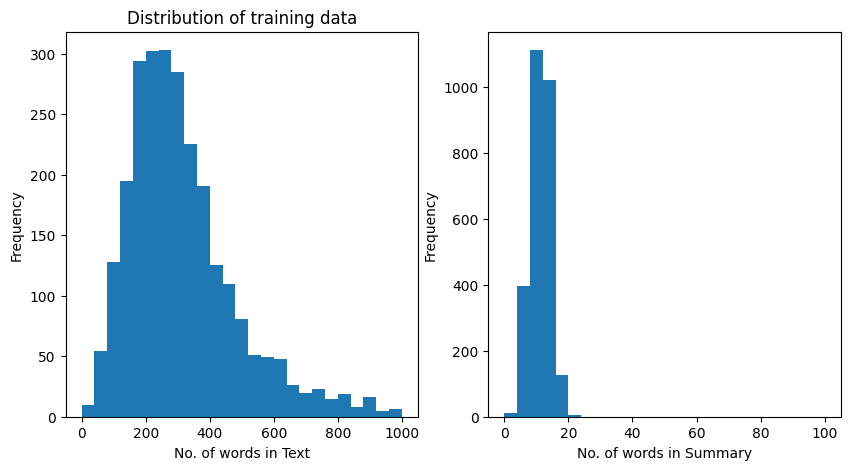

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in tokenized_corpus_src[:train.shape[0]]:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_trg[:train.shape[0]]:
      summary_word_count.append(len(i.split()))

fig , ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].hist(text_word_count, bins=25, range=[0, 1000])
ax[1].hist(summary_word_count, bins=25, range=[0, 100])
ax[0].set_xlabel("No. of words in Text")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("No. of words in Summary")
ax[1].set_ylabel("Frequency")
ax[0].set_title('Distribution of training data')
plt.show()

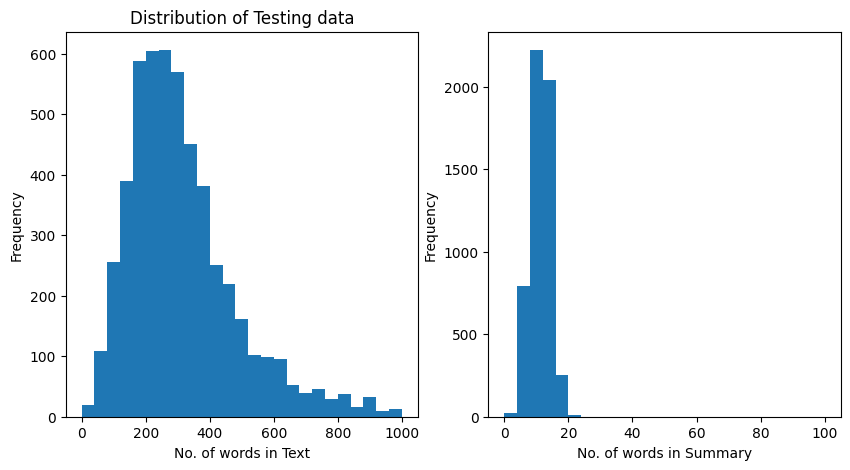

In [ ]:
for i in tokenized_corpus_src[:-test.shape[0]]:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_trg[:-test.shape[0]]:
      summary_word_count.append(len(i.split()))

fig , ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].hist(text_word_count, bins=25, range=[0, 1000])
ax[1].hist(summary_word_count, bins=25, range=[0, 100])
ax[0].set_xlabel("No. of words in Text")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("No. of words in Summary")
ax[1].set_ylabel("Frequency")
ax[0].set_title('Distribution of Testing data')
plt.show()

In [ ]:
news['Text_Cleaned'] = tokenized_corpus_src  
print("::::: Text_Cleaned :::::")
print(news['Text_Cleaned'][0:5], "\n")


news['Summary_Cleaned'] =  tokenized_corpus_trg 
print("::::: Summary :::::")
print(news['Summary_Cleaned'][0:5], "\n")

corpus = list(news['Text_Cleaned'])

::::: Text_Cleaned :::::
0    जम्मू-कश्मीर में जहां सोशल नेटवर्किंग साइट फेस...
1    भारत का मणिपुर राज्य अपने आप में कई खूबसूरत नज...
2    रेल मंत्री और वरिष्ठ बीजेपी नेता डीवी सदानंद ग...
3    साल में रिलीज हुई हिंदी फिल्म चाची की नटखट चाच...
4    केंद्र सरकार डिजिटल ट्रांजेक्शन को बढ़ावा देने...
Name: Text_Cleaned, dtype: object 

::::: Summary :::::
0      जम्मू में राजनेता फेसबुक पर एक्टिव पुलिस परेशान
1    मणिपुर की इस झील में है दुनिया का एकमात्र तैरत...
2       सिद्धारमैया सरकार किसी वक्त गिर सकती है बीजेपी
3    फिल्म सदमा चाची के लीड एक्टर कमल हासन को जन्मद...
4    डिजिटल लेन-देन पर नायडू की क्लास कई बड़े मंत्र...
Name: Summary_Cleaned, dtype: object 



In [ ]:
text_count = []
summary_count = []

for sent in news['Text_Cleaned']:
    text_count.append(len(sent.split()))
for sent in news['Summary_Cleaned']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = text_count
graph_df['summary'] = summary_count

In [ ]:
graph_df['text'].describe()

count    5334.000000
mean      352.450881
std       313.441471
min        11.000000
25%       199.000000
50%       285.000000
75%       398.750000
max      5133.000000
Name: text, dtype: float64

In [ ]:
graph_df['summary'].describe()

count    5334.000000
mean       10.841582
std         2.995626
min         0.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        22.000000
Name: summary, dtype: float64

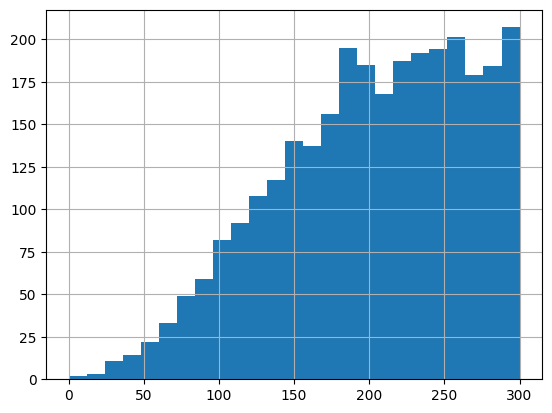

In [ ]:
graph_df['text'].hist(bins = 25, range=(0, 300))
plt.show()

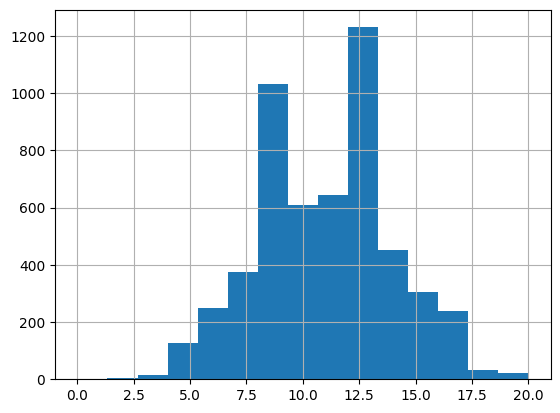

In [ ]:
graph_df['summary'].hist(bins = 15, range=(0, 20))
plt.show()

In [ ]:
count = 0
for i in graph_df['text']:
    if i > 10 and i <= 300:
        count = count + 1
print(count / len(graph_df['text']))

0.5468691413573303


In [ ]:
count = 0
for i in graph_df['summary']:
    if i > 1 and i <= 20:
        count = count + 1
print(count / len(graph_df['summary']))

0.9992500937382827


In [ ]:
max_text_len = 300
max_summary_len = 16

In [ ]:
cleaned_text = np.array(news['Text_Cleaned'])
cleaned_summary = np.array(news['Summary_Cleaned'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split()) <= max_summary_len 
       and len(cleaned_summary[i].split()) > 1 
       and len(cleaned_text[i].split()) <= max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
    elif((len(cleaned_summary[i].split()) > max_summary_len) or (len(cleaned_text[i].split()) > max_text_len)):
        summ = cleaned_summary[i].split()
        txt = cleaned_text[i].split()
        if(len(summ)>max_summary_len):
          short_summary.append(' '.join(summ[:max_summary_len]))
        else:
          short_summary.append(cleaned_summary[i])
        if(len(txt)>max_text_len):
          short_text.append(' '.join(txt[:max_text_len]))
        else:
          short_text.append(cleaned_text[i]) 
    
post_pre = pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
post_pre['text'] = post_pre['text'].apply(lambda x: 'sostok ' + x + ' eostok')

In [ ]:
post_pre.shape

(5334, 2)

In [ ]:
cleaned_summary = np.array(post_pre['summary'])
cleaned_text = np.array(post_pre['text'])
print("cleaned text's size ",cleaned_text.shape)
print("cleaned summary's size ",cleaned_summary.shape)

cleaned text's size  (5334,)
cleaned summary's size  (5334,)


# Tokenizer and Padding

In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences

In [ ]:
#Tokenize text to get the vocab count
#prepare a tokenizer for training data
text_tokenizer = Tokenizer() 
text_tokenizer.fit_on_texts(list(cleaned_text))

#prepare a tokenizer for reviews on training data
summary_tokenizer = Tokenizer()   
summary_tokenizer.fit_on_texts(list(cleaned_summary))

In [ ]:
vocab = text_tokenizer.word_index
import random
def sample_from_dict(d, sample=10):
    keys = random.sample(list(d), sample)
    values = [d[k] for k in keys]
    return dict(zip(keys, values))

print(sample_from_dict(vocab))

{'इवोबी': 16393, 'वॉर्ड': 21423, 'असहज': 8851, 'रेंट': 30999, 'लकड़ियों': 20688, 'अधिकारपूर्ण': 30928, 'पंसद': 22074, 'क्रॉनिकल': 32914, 'इनफ्रास्ट्रक्चर': 30029, 'बैंक': 273}


In [ ]:
len(vocab)

40718

In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in text_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 62.372906331352226
Total Coverage of rare words: 2.7927202934853654


In [ ]:
encoder_vocab_size = 0
decoder_vocab_size = 0

In [ ]:
# #prepare a tokenizer for reviews on training data
text_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
text_tokenizer.fit_on_texts(list(cleaned_text))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
text__seq    =   text_tokenizer.texts_to_sequences(cleaned_text)
#padding zero upto maximum length
cleaned_text    =   pad_sequences(text__seq,  maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
encoder_vocab_size = text_voc   =  text_tokenizer.num_words + 1

print("Size of vocabulary in text = {}".format(text_voc))

Size of vocabulary in text = 15322


In [ ]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in summary_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 76.6440135918449
Total Coverage of rare words: 15.933063916081874


In [ ]:
#prepare a tokenizer for reviews on training data
summary_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
summary_tokenizer.fit_on_texts(list(cleaned_summary))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
summary__seq    =   summary_tokenizer.texts_to_sequences(cleaned_summary)
#padding zero upto maximum length
cleaned_summary    =   pad_sequences(summary__seq,  maxlen=max_summary_len, padding='post')

#size of vocabulary ( +1 for padding token)
decoder_vocab_size = summary_voc   =  summary_tokenizer.num_words + 1

print("Size of vocabulary in summary = {}".format(summary_voc))

Size of vocabulary in summary = 2338


In [ ]:
summary_tokenizer.word_counts['sostok'],len(cleaned_summary)


(5334, 5334)

In [ ]:
import pickle

with open(default_path+'text_tokenizer.pickle', 'wb') as handle:
    pickle.dump(text_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(default_path+'summary_tokenizer.pickle', 'wb') as handle:
    pickle.dump(summary_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
ind=[]
for i in range(len(cleaned_summary)):
    cnt=0
    for j in cleaned_summary[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

cleaned_text = np.delete(cleaned_text, ind, axis=0)
cleaned_summary = np.delete(cleaned_summary, ind, axis=0)

In [ ]:
print("cleaned text's size ",cleaned_text.shape)
print("cleaned summary's size ",cleaned_summary.shape)

cleaned text's size  (5330, 300)
cleaned summary's size  (5330, 16)


In [ ]:
cleaned_text

array([[  24,  461,  245, ...,    0,    0,    0],
       [  24,   50,    9, ...,    0,    0,    0],
       [  24, 1037,  101, ...,    0,    0,    0],
       ...,
       [  24,   82,  263, ...,    0,    0,    0],
       [  24, 1676,  338, ...,    0,    0,    0],
       [  24, 1710,  834, ...,    0,    0,    0]], dtype=int32)

In [ ]:
cleaned_summary


array([[   1,  263,    3, ...,    0,    0,    0],
       [   1,  891,    5, ...,    0,    0,    0],
       [   1, 1537,   22, ...,    0,    0,    0],
       ...,
       [   1,  445,  177, ...,    0,    0,    0],
       [   1,  385,    5, ...,    2,    0,    0],
       [   1,   26,  311, ...,    2,    0,    0]], dtype=int32)

# Saving Final Input Text

In [ ]:
import pickle

with open(default_path+'cleaned_text.pickle', 'wb') as handle:
    pickle.dump(cleaned_text, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(default_path+'cleaned_summary.pickle', 'wb') as handle:
    pickle.dump(cleaned_summary, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Embedding Space

In [ ]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393390 sha256=d182b856389ae75b88d60207ea2c5dfb08661b6a2aee500e8f76d72c837384eb
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext.util

In [ ]:
# fasttext.util.download_model('hi', if_exists='ignore')  # Hindi

In [ ]:
ft = fasttext.load_model(default_path+'cc.hi.300.bin')

In [ ]:
word = "नृत्य"
print("Embedding vector shape is {}".format(ft.get_word_vector(word).shape[0]))

Embedding vector shape is 300


# Embedding Matrix - Get Vectors

In [ ]:
def create_weight_matrix(model, DICT_SIZE, tokenizer):
  '''
  Accepts word embedding model
  and the second model, if provided
  Returns weight matrix of size m*n, where
  m - size of the dictionary
  n - size of the word embedding vector

  '''
  vector_size = model.get_word_vector("नृत्य").shape[0]
  w_matrix = np.zeros((DICT_SIZE, vector_size))
  unk_words = []
  text_words = []
  for word, index in tokenizer.word_index.items():
    if index < DICT_SIZE:
      if word in model.words: 
        w_matrix[index] = model.get_word_vector(word)
        text_words.append(word)
      else:
        w_matrix[index] = np.random.rand(1, vector_size)
        unk_words.append(word)
        
  
  print('{} words were considered as they were found in embedding space:'.format(len(text_words)))
  print('{} are some such words'.format(text_words[:10]))
  print()  
  print('{} words were randomly alloted as they were not found in embedding space:'.format(len(unk_words)))
  print('{} are some such words'.format(unk_words[:10]))

  return w_matrix

In [ ]:
text_matrix = create_weight_matrix(ft, text_voc, text_tokenizer)

15237 words were considered as they were found in embedding space:
['के', 'में', 'है', 'की', 'को', 'ने', 'से', 'और', 'का', 'पर'] are some such words

84 words were randomly alloted as they were not found in embedding space:
['sostok', 'eostok', 'बसीरन', 'इनाया', 'एमएमएल', 'पुनालेकर', 'राडियाः', 'चोटीकटवा', 'रठवा', 'पायास'] are some such words


In [ ]:
summ_matrix = create_weight_matrix(ft, summary_voc, summary_tokenizer)

2335 words were considered as they were found in embedding space:
['में', 'के', 'की', 'का', 'ने', 'को', 'से', 'पर', 'है', 'नहीं'] are some such words

2 words were randomly alloted as they were not found in embedding space:
['sostok', 'eostok'] are some such words


# Saving Embedding Matrices

In [ ]:
with open(default_path+'text_matrix.pickle', 'wb') as handle:
    pickle.dump(text_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(default_path+'summ_matrix.pickle', 'wb') as handle:
    pickle.dump(summ_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Model

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import time
import re
import pickle
import matplotlib.pyplot as plt 

# Loading Cleaned Dataset

In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64


In [ ]:
with open(default_path+'cleaned_text.pickle', 'rb') as handle:
    cleaned_text = pickle.load(handle)
with open(default_path+'cleaned_summary.pickle', 'rb') as handle:
    cleaned_summary = pickle.load(handle)

In [ ]:
cleaned_text.shape

(5330, 300)

# Train Test Split

In [ ]:
x_train, y_train = cleaned_text[:cleaned_text.shape[0]-test.shape[0], :], cleaned_summary[:cleaned_summary.shape[0]-test.shape[0], :]
x_test, y_test = cleaned_text[:-test.shape[0], :], cleaned_summary[:-test.shape[0], :]

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

# Positional Encoding for adding notion of position among words as unlike RNN this is non-directional

In [ ]:
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

In [ ]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

# Masking

> Padding mask for masking "pad" sequences


> Lookahead mask for masking future words from contributing in prediction of current words in self attention





In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [ ]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

# Building the Model

Scaled Dot Product

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)
    return output, attention_weights

Multi-Headed Attention

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)
            
        return output, attention_weights

# Feed Forward Network

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

Fundamental Unit of Transformer encoder

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
    
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

Fundamental Unit of Transformer decoder

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

Encoder consisting of multiple EncoderLayer(s)

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, emb_matrix, max_len, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_dim = input_vocab_size, 
                      output_dim = d_model,
                      input_length = max_len, # max_len of text sequence - 300
                      weights=[emb_matrix],
                      trainable=False) # static weights to be assigned from pretrained embedding
        #self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x

Decoder consisting of multiple DecoderLayer(s)

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, emb_matrix, max_len, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        #self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.embedding = tf.keras.layers.Embedding(input_dim = target_vocab_size, 
                      output_dim = d_model,
                      input_length = max_len, # max_len of summ sequence - 16
                      weights=[emb_matrix],
                      trainable=False)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
        return x, attention_weights

Finally, the Transformer

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, text_matrix, max_len_text, summ_matrix, max_len_summ, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, text_matrix, max_len_text, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, summ_matrix, max_len_summ, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)

        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

# Training

In [ ]:
with open(default_path+'text_matrix.pickle', 'rb') as handle:
    text_matrix = pickle.load(handle)
with open(default_path+'summ_matrix.pickle', 'rb') as handle:
    summ_matrix = pickle.load(handle)

In [ ]:
# hyper-params
num_layers = 4
d_model = text_matrix.shape[1]
dff = 512
num_heads = 10
EPOCHS = 10
max_len_text = 300
max_len_summ = 16

In [ ]:
# encoder_vocab_size = 15322
# decoder_vocab_size = 2338

Adam optimizer with custom learning rate scheduling

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # Cast step to float32
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Custom Loss and Accuracy Functions

In [ ]:
learning_rate = CustomSchedule(d_model)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')

In [ ]:
val_loss = tf.keras.metrics.Mean(name='val_loss')

Transformer

In [ ]:
transformer = Transformer(
    num_layers, 
    d_model, 
    num_heads, 
    dff,
    encoder_vocab_size, 
    decoder_vocab_size, 
    pe_input = encoder_vocab_size, 
    pe_target = decoder_vocab_size,
    text_matrix = text_matrix, 
    max_len_text = max_len_text, 
    summ_matrix = summ_matrix, 
    max_len_summ = max_len_summ
)

Masks

In [ ]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
    return enc_padding_mask, combined_mask, dec_padding_mask

Checkpoints

In [ ]:
checkpoint_path = default_path+"checkpoints"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


Training steps

In [ ]:
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp, 
            True, 
            enc_padding_mask, 
            combined_mask, 
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)
        
    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)

# Test Validation Steps

In [ ]:
@tf.function
def val_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp, 
            False, 
            enc_padding_mask, 
            combined_mask, 
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)
    val_loss(loss)

In [ ]:
train.info

<bound method DataFrame.info of       Unnamed: 0                                           headline  \
0           2667  जम्‍मू में राजनेता फेसबुक पर एक्टिव, पुलिस परेशान   
1           2668  मणिपुर की इस झील में है दुनिया का एकमात्र तैरत...   
2           2669    सिद्धारमैया सरकार किसी वक्त गिर सकती है: बीजेपी   
3           2670  फिल्‍म 'सदमा', 'चाची 420' के लीड एक्‍टर कमल हा...   
4           2671  डिजिटल लेन-देन पर नायडू की क्लास, कई बड़े मंत्...   
...          ...                                                ...   
2662        5329  हैदराबाद में गूंजा 'जन गण मन', सिंधू और गोपीचं...   
2663        5330  पंजाब: गुरदासपुर में 3 लोग कार लेकर फरार, पुलि...   
2664        5331  राष्ट्रपति प्रतिभा पाटिल संयुक्त अरब अमीरात दौ...   
2665        5332  रितिक की 'कृष3' को पछाड़ कमाई में दूसरे नंबर प...   
2666        5333             काम करेगा पीएम मोदी का फीडबैक फॉर्मूला   

                                                article  
0     जम्मू-कश्‍मीर में जहां सोशल नेटवर्किंग साइट फे...  

In [ ]:
train_loss_values = []
test_loss_values = []
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
    val_loss.reset_states()
    #training set - forward prop, loss fn, (gradient descent and optimization) backprop
    for (batch, (inp, tar)) in enumerate(dataset):
        train_step(inp, tar)
    
        # 85k samples
        # we display 3 batch results -- 0th, middle and last one (approx)
        # 85k / 64 ~ 1328; 1328 / 2 ~ 664
        if batch % 2601 == 0:
            print ('Epoch {} ========> Batch {} Loss {:.4f}'.format(epoch + 1, batch, train_loss.result().numpy()))
      
    if (epoch + 1) % 2 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))

    train_loss_values.append(train_loss.result().numpy())
    
    #test set - forward pass, loss fn (no backward pass)
    for (batch, (inp, tar)) in enumerate(test_dataset):
        val_step(inp, tar)

    test_loss_values.append(val_loss.result().numpy())
    
    print ('Epoch {}/{} ========> Training Loss {:.4f} Test/Validation Loss {:.4f}'.format(epoch + 1, EPOCHS, train_loss.result().numpy(), val_loss.result().numpy()))
    
    print ('Time taken for epoch {}: {:.2f} secs\n'.format(epoch+1, time.time() - start))

Epoch 1 ========> Batch 0 Loss 5.9347
Epoch 1/10 ========> Training Loss 5.8562 Test/Validation Loss 5.7779
Time taken for epoch 1: 372.72 secs

Epoch 2 ========> Batch 0 Loss 5.7561
Saving checkpoint for epoch 2 at /content/drive/MyDrive/BE_Project/checkpoints/ckpt-6
Epoch 2/10 ========> Training Loss 5.7867 Test/Validation Loss 5.6831
Time taken for epoch 2: 20.99 secs

Epoch 3 ========> Batch 0 Loss 5.6784
Epoch 3/10 ========> Training Loss 5.7081 Test/Validation Loss 5.6049
Time taken for epoch 3: 19.61 secs

Epoch 4 ========> Batch 0 Loss 5.6027
Saving checkpoint for epoch 4 at /content/drive/MyDrive/BE_Project/checkpoints/ckpt-7
Epoch 4/10 ========> Training Loss 5.6408 Test/Validation Loss 5.5316
Time taken for epoch 4: 21.26 secs

Epoch 5 ========> Batch 0 Loss 5.5353
Epoch 5/10 ========> Training Loss 5.5698 Test/Validation Loss 5.4393
Time taken for epoch 5: 20.00 secs

Epoch 6 ========> Batch 0 Loss 5.6224
Saving checkpoint for epoch 6 at /content/drive/MyDrive/BE_Project/ch

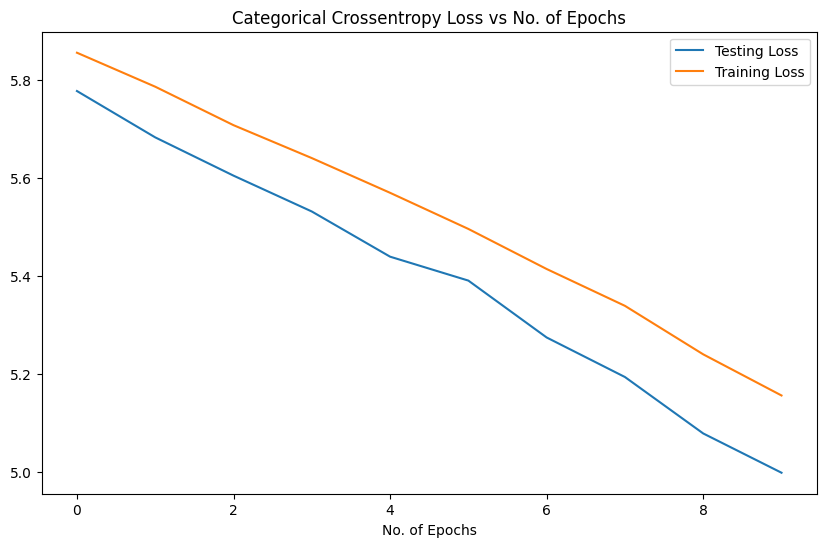

In [ ]:
no_of_epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,1)
fig.set_size_inches(10,6)
ax.plot(no_of_epochs, test_loss_values, label = 'Testing Loss')
ax.plot(no_of_epochs, train_loss_values, label = 'Training Loss')
ax.set_title('Categorical Crossentropy Loss vs No. of Epochs')
ax.legend()
ax.set_xlabel("No. of Epochs")
plt.show()

# Predicting one word at a time at the decoder and appending it to the output; then taking the complete sequence as an input to the decoder and repeating until maxlen or stop keyword appears

In [ ]:
with open(default_path+'text_tokenizer.pickle', 'rb') as handle:
    text_tokenizer = pickle.load(handle)
with open(default_path+'summary_tokenizer.pickle', 'rb') as handle:
    summary_tokenizer = pickle.load(handle)
max_text_len = 300
max_summary_len = 16

In [ ]:
def predict(input_document):
    # #clean
    global checkpoint
    checkpoint = "ai4bharat/IndicBART"
    #input_document = preprocess_tokenize(input_document)
    input_document = "sostok "+input_document+" eostok"
    #tokenize
    input_document = text_tokenizer.texts_to_sequences([input_document])
    #padding
    input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=max_text_len, padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_document[0], 0)

    decoder_input = [summary_tokenizer.word_index["sostok"]]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(max_summary_len):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input, 
            output,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask,
        )

        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index["eostok"]:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def summtext(input_document):
    # not considering attention weights for now, can be used to plot attention heatmaps in the future
    summarized = predict(input_document=input_document)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  # not printing <go> token
    return summary_tokenizer.sequences_to_texts(summarized)[0]  # since there is just one translated document

In [ ]:
summtext("पूर्व प्रधानमंत्री और कांग्रेस के दिग्गज नेता राजीव गांधी की आज 75वीं जयंती है. इस मौके पर कांग्रेस अध्यक्ष राहुल गांधी, यूपीए चेयरपर्सन सोनिया गांधी, प्रियंका गांधी, पूर्व प्रधानमंत्री मनमोहन सिंह समेत कई बड़े कांग्रेस नेताओं ने उन्हें श्रद्धांजलि अर्पित की. प्रधानमंत्री नरेंद्र मोदी ने भी ट्वीट कर उन्हें श्रद्धांजलि दी. बता दें कि राजीव गांधी का जन्म आज ही के दिन 1944 में हुआ था. 21 मई, 1991 को उनकी हत्या कर दी गई थी. राजीव गांधी 1984 से 1989 तक प्रधानमंत्री रहे. तमिलनाडु के श्रीपेरंबुदुर में 21 मई, 1991 को आम चुनाव के प्रचार के दौरान एलटीटीई के एक आत्मघाती हमलावर ने राजीव गांधी की हत्या कर दी थी. 1984 में इंदिरा गांधी की हत्या के बाद वह भारी बहुमत के साथ प्रधानमंत्री बने. राजीव गांधी की राजनीति में कोई रूचि नहीं थी और वो एक एयरलाइन पायलट की नौकरी करते थे और उसी में खुश थे. लेकिन आपातकाल के उपरान्त जब इंदिरा गांधी को सत्ता छोड़नी पड़ी थी. वहीं साल 1980 में छोटे भाई संजय गांधी की हवाई जहाज दुर्घटना में मृत्यु हो जाने के बाद माता इंदिरा का सहयोग देने के लिए उन्होंने राजनीति में प्रवेश कर लिया.")


'कांग्रेस में की बड़ी खबरें'

# Output

In [ ]:
documents = test["article"]
summary = test["headline"]

In [ ]:
samples = [17, 35, 69, 21, 26]
docs = []
summ = []
pred = []
for i in samples:
  pred.append(summarize(documents[i]))
  docs.append(' '.join(documents[i].split(' ')[:100]))
  summ.append(summary[i])


result_df = pd.DataFrame({'Input': docs, 'Reference Summary': summ, 'Model Output Summary': pred, 'Padding':pred })
result_df[['Input', 'Reference Summary', 'Model Output Summary']] #17, 69, 21, 26, 35
result_df.style.set_properties(subset=['Input', 'Padding'], **{'width': '400px'})

,Input,Reference Summary,Model Output Summary,Padding
0,प्रधानमंत्री मनमोहन सिंह ने प्याज की उंची कीमतों पर चिंता जताते हुए कहा कि इसके दाम को उचित स्तर पर लाने के लिए तत्काल जरूरी कदम उठाए जाएंगे. प्रधानमंत्री कार्यालय की ओर से उपभोक्ता मामलों तथा कृषि मंत्रालय के सचिवों को भेजे पत्र में मनमोहन ने प्याज की कीमतों में अचानक आए बेहतहाशा उछाल पर चिंता जताई है. देश के विभिन्न शहरों में प्याज के दाम अचानक कुछ दिन में ही बढ़कर 70 रुपये प्रति किलोग्राम पर पहुंच गए हैं. आपूर्ति में कमी की वजह से संभवत: प्याज के दामांे में तेजी आई है. एक सूत्र ने कहा कि प्रधानमंत्री चाहते हैं कि,"प्‍याज की कीमतों पर बोलें पीएम, कीमतें घटाने के लिए कदम उठाएंगे",के लिए पर की बड़ी खबरें,के लिए पर की बड़ी खबरें
1,दिल्ली से सटे यूपी के गाजियाबाद में बच्चियों के साथ अश्लील हरकतों से लेकर रेप तक की घटनाएं रुकने का नाम नहीं ले रही हैं. ताजा घटना में एक 73 वर्षीय बुजुर्ग पर दूसरी कक्षा में पढ़ने वाली मासूम बच्ची के साथ अश्लील हरकतें करने का आरोप लगा है. परिजनों की शिकायत पर पुलिस ने आरोपी को गिरफ्तार कर लिया है. यह शर्मनाक वारदात गाजियाबाद के मसूरी थाना इलाके की है. जहां रहने वाले 73 साल के एक बुजुर्ग ने पड़ोस में रहने वाली मासूम बच्ची को अपने घर बुलाया और उसके साथ गंदी हरकत की. बच्ची ने घर जाकर इस बारे में,मासूम बच्ची के साथ 'गंदी बात' करने वाला 73 साल का बुजुर्ग गिरफ्तार,दिल्ली में की मौत में मौत,दिल्ली में की मौत में मौत
2,"संसद में तीन तलाक बिल पास होने के बावजूद भी ट्रिपल तलाक का सिलसिला थमने का नाम नहीं ले रहा है. ताजा मामला उत्तर प्रदेश के जौनपुर का है, जहां एक शख्स ने अपनी पत्नी को फोन पर तीन तलाक दे दिया है. वहीं पत्नी ने जब तीन तलाक को कानूनी रूप से गलत ठहराने की बात कही तो पति ने कहा कि सरकार का कानून नहीं बल्कि शरीयत की बात मानता है. पत्नी ने कोर्ट का दरवाजा खटखटाते हुए इंसाफ की गुहार लगाई है. वहीं पीड़िता ने मुख्यमंत्री, पुलिस महानिदेशक और पुलिस अधीक्षक को भेजे गए प्रार्थना पत्र में पति","यूपी: पति ने कानून की उड़ाईं धज्जियां, फोन पर पत्नी को दिया तीन तलाक",ने की की की की की की,ने की की की की की की
3,पाकिस्तान ने दूसरे और अंतिम क्रिकेट टेस्ट मैच में ऑस्ट्रेलिया की पहली पारी को सस्ते में केवल 88 रन के स्कोर पर समेट देने के बाद पहले दिन का खेल समाप्त होने तक तीन विकेट पर 148 रन बना लिए. टेस्ट किक्रेट की इतिहास में आस्ट्रेलियाई टीम की यह सबसे न्यूनतम स्कोर है. इससे पूर्व वह 1984 में वेस्ट इंडीज के खिलाफ पर्थ में मात्र 76 रन के स्कोर पर लूढ़क गई थी. पाकिस्तान की ओर से आमेर और आसीफ ने तीन-तीन विकेट झटके. उमर गुल को दो और अमीन को एक विकट हासिल हुआ. सुबह ऑस्ट्रेलियाई कप्तान रिकी पोंटिंग ने टॉस जीतकर,ऑस्ट्रेलिया के खिलाफ टेस्ट मैच में पाक मजूबत,ने को को को को को,ने को को को को को
4,वरुण धवन अपनी फिल्म 'बदलापुर' को प्रमोट करने का कोई मौका नहीं छोड़ रहे हैं. टीवी के लोकप्रिय शो CID में भी जल्द ही वरुण का बदला नजर आएगा. गौरतलब है कि इससे पहले भी कई सितारे सोनी चैनल के पुराने सीरियल सीआईडी में फिल्मों के प्रमोशन के लिए नजर आ चुके हैं. वरुण धवन सीआईडी के एक स्पेशल एपिसोड में अपनी बीवी के कत्ल का बदला लेते नजर आएंगे. इसमें उनका साथ देगी सीआईडी की टीम. बदलापुर में वरुण के अलावा यामी गौतम और नवाजुद्दीन सिद्दीकी भी नजर आएंगे. 'बदलापुर' कई वजहों से चर्चा में हैं. खबर आई थी कि बदलापुर के,अब CID में नजर आएगा वरुण धवन का बदला,ने की फिल्म को किया,ने की फिल्म को किया


# Summary Evaluation - ROUGE

In [ ]:
!pip install rouge


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge

In [ ]:
rouge = Rouge()


In [ ]:
summary = result_df['Model Output Summary'][0]
reference = result_df['Reference Summary'][0]

In [ ]:
rouge.get_scores(summary,reference)

[{'rouge-1': {'r': 0.3333333333333333,
   'p': 0.6666666666666666,
   'f': 0.44444444000000005},
  'rouge-2': {'r': 0.09090909090909091, 'p': 0.2, 'f': 0.12499999570312517},
  'rouge-l': {'r': 0.16666666666666666,
   'p': 0.3333333333333333,
   'f': 0.22222221777777784}}]

# **UI**

In [1]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=185da5f05307b733da00a87bbcce1a32e915f8397425f559651f7dae6fd681cd
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [3]:
!pip install torch pandas transformers sentencepiece plotly matplotlib datasets gradio indicnlp rouge -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 22.1 MB/s eta 0:00:00


In [4]:
!pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.6 MB/s eta 0:00:00


In [5]:

import gradio as gr
from langdetect import detect 
from bs4 import BeautifulSoup
import re
import gradio as gr
import re
from transformers import  AutoModelForSeq2SeqLM, AutoTokenizer
ms = AutoModelForSeq2SeqLM
at = AutoTokenizer
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from collections import Counter
from indicnlp.tokenize import indic_tokenize
from langdetect import detect

In [6]:
noise1 = re.compile(r"[([].*?[\)\]]\s+") 
noise2 = re.compile(r"\{.*?\}")  
noise3 = re.compile(r"[a-zA-Z]")
noise4 = re.compile(r"[\{()#@:%,_;&!=}\]]")
noise5 = re.compile(r'[\?\]]')
WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

def extract_text(url):
  
  data = requests.get(url)
  soup = BeautifulSoup(data.content, "html.parser")
  
  try:
    vistaar = soup.find(class_ = "article-desc ul_styling")
    vistaar = vistaar.text
  except Exception as e:
    print(f"Not able to fetch text {e}")
 
  vistaar = vistaar.replace("विस्तार ", ' ')
  vistaar = vistaar.replace("विज्ञापन", ' ')
  vistaar = vistaar.replace("\n", ' ')
  vistaar = re.sub('\xa0', ' ', vistaar)
  vistaar = re.sub(noise2, ' ', vistaar)
  vistaar = re.sub(noise3, ' ', vistaar)
  vistaar = re.sub(noise4, ' ', vistaar)
  vistaar = re.sub(' +', ' ', vistaar)

  return vistaar

def is_hindi(text):
    lang = detect(text)
    if lang == "hi":
        return True
    else:
      return False

def summtext(input_):
  if input_.split("/")[0] == "https:":
    text = extract_text(input_)
  else:
    text = input_
    if (len(text) == 0) :
      return "No Input."
    elif is_hindi(text) == False :
      return "The given text is not in hindi."  
  
  checkpoint = "ai4bharat/IndicBART"
  embedder = at.from_pretrained(checkpoint)
  model = ms.from_pretrained(checkpoint)
  input_ids = embedder(
                  [WHITESPACE_HANDLER(text)],
                  return_tensors="pt",
                  padding="max_length",
                  truncation=True,
                  max_length=512 )["input_ids"]

  output_ids = model.generate(
                    input_ids=input_ids,
                    max_length=70,
                    min_length=30,
                    no_repeat_ngram_size=2,
                    num_beams=4 )[0]     

  
  summary = embedder.decode(
                      output_ids,
                      skip_special_tokens=True,
                      clean_up_tokenization_spaces=False)
  
  return summary

In [ ]:
description = """
<center>
Abstractive Hindi Text Summerizer
</center>
"""

link1 = "https://www.amarujala.com/world/india-providing-dry-ration-packs-to-widows-and-needy-families-in-sri-lanka-ahead-of-eid-ins-gharial-brough-medicines-to-colombo-news-in-hindi"

link2 = "https://www.amarujala.com/lucknow/now-the-government-will-go-to-village-to-buy-wheat-in-up-and-wheat-will-also-be-purchased-from-mobile-purchasing-centers"

link3 = "https://www.amarujala.com/india-news/supreme-court-cannot-give-the-status-of-place-of-namaz-without-evidence-rajasthan-waqf-board-s-petition-challenging-the-high-court-order-dismissed?pageId=1"

#with open("File.txt", 'r',  encoding="utf8") as f:
text = "पूर्व प्रधानमंत्री और कांग्रेस के दिग्गज नेता राजीव गांधी की आज 75वीं जयंती है. इस मौके पर कांग्रेस अध्यक्ष राहुल गांधी, यूपीए चेयरपर्सन सोनिया गांधी, प्रियंका गांधी, पूर्व प्रधानमंत्री मनमोहन सिंह समेत कई बड़े कांग्रेस नेताओं ने उन्हें श्रद्धांजलि अर्पित की. प्रधानमंत्री नरेंद्र मोदी ने भी ट्वीट कर उन्हें श्रद्धांजलि दी. बता दें कि राजीव गांधी का जन्म आज ही के दिन 1944 में हुआ था. 21 मई, 1991 को उनकी हत्या कर दी गई थी. राजीव गांधी 1984 से 1989 तक प्रधानमंत्री रहे. तमिलनाडु के श्रीपेरंबुदुर में 21 मई, 1991 को आम चुनाव के प्रचार के दौरान एलटीटीई के एक आत्मघाती हमलावर ने राजीव गांधी की हत्या कर दी थी. 1984 में इंदिरा गांधी की हत्या के बाद वह भारी बहुमत के साथ प्रधानमंत्री बने. राजीव गांधी की राजनीति में कोई रूचि नहीं थी और वो एक एयरलाइन पायलट की नौकरी करते थे और उसी में खुश थे. लेकिन आपातकाल के उपरान्त जब इंदिरा गांधी को सत्ता छोड़नी पड़ी थी. वहीं साल 1980 में छोटे भाई संजय गांधी की हवाई जहाज दुर्घटना में मृत्यु हो जाने के बाद माता इंदिरा का सहयोग देने के लिए उन्होंने राजनीति में प्रवेश कर लिया."
text2 = "सैमसंग इंडिया ने शुक्रवार को मिनिस्ट्री ऑफ माइक्रो, स्मॉल एंड मिडियम इंटरप्राइजेस (MSME) के साथ एमओयू पर हस्ताक्षर किए, जिसके तहत दो और टेक्निकल स्कूल खोलने और देश भर में चल रहे 10 वर्तमान स्कूलों को चलाने के लिए पार्टनरशिप को रिन्यू किया गया. कंपनी ने एक बयान में कहा कि एमओयू के मुताबिक वह बेंगलुरू और जमशेदपुर में दो नए MSME-Samsung टेक्निकल स्कूल खोलेगी. सूक्ष्म, लघु एवं मध्यम उद्यम मंत्री कलराज मिश्र ने एक बयान में कहा, 'हम उद्योग के लिए तैयार कार्यबल के निर्माण के लिए प्रतिबद्ध हैं और स्किल इंडिया कार्यक्रम के तहत हम युवाओं को इंडस्ट्री को ध्यान में"

interface = gr.Interface(fn = summtext,
                        inputs = [gr.inputs.Textbox(lines=5,
                                                    placeholder="Enter your text...",
                                                    label='News Input')],
                          
                        outputs = [gr.outputs.Textbox(label="Hindi Summarizer")],
                         
                        title = "Hindi Summarizer",
                        examples=[[link1], 
                                  [link2], 
                                  [text], 
                                  [text2]],
                            
                        description=description,
                        css = "footer {visibility: hidden}")

# interface.launch(share = True)

interface.launch(debug=True, share = True) 

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://01bda8dd72785ce752.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
